# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Makin' some data
from sklearn.datasets import make_circles

import seaborn as sns; sns.set(color_codes=True)

In [30]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression

In [31]:
# Your code here
paysim = pd.read_csv("data_inbalace.csv")
paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [32]:
# taking a sample of the dataframe
paysim_new = paysim.sample(n=100000, random_state=29)

In [33]:
paysim_new.shape

(100000, 11)

In [34]:
paysim_new.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [35]:
paysim_new.isFraud.value_counts()[1]/paysim_new.isFraud.value_counts()[0]

0.0011713705034890822

In [36]:
len(paysim_new.step.value_counts())

459

In [37]:
paysim_new.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,243.332200,1.822871e+05,8.341074e+05,8.558691e+05,1.124523e+06,1.250704e+06,0.001170,0.0
std,142.572166,6.696600e+05,2.875067e+06,2.911441e+06,3.645167e+06,3.906895e+06,0.034185,0.0
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,155.000000,1.326610e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,238.000000,7.505928e+04,1.468500e+04,0.000000e+00,1.282336e+05,2.112388e+05,0.000000,0.0
75%,335.000000,2.092909e+05,1.090472e+05,1.487216e+05,9.550269e+05,1.121737e+06,0.000000,0.0
max,732.000000,9.244552e+07,3.523601e+07,3.537580e+07,3.281945e+08,3.279981e+08,1.000000,0.0


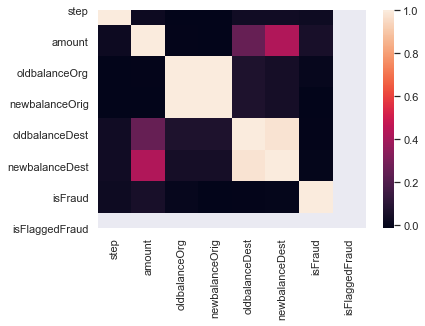

In [38]:
sns.heatmap(paysim_new.corr())

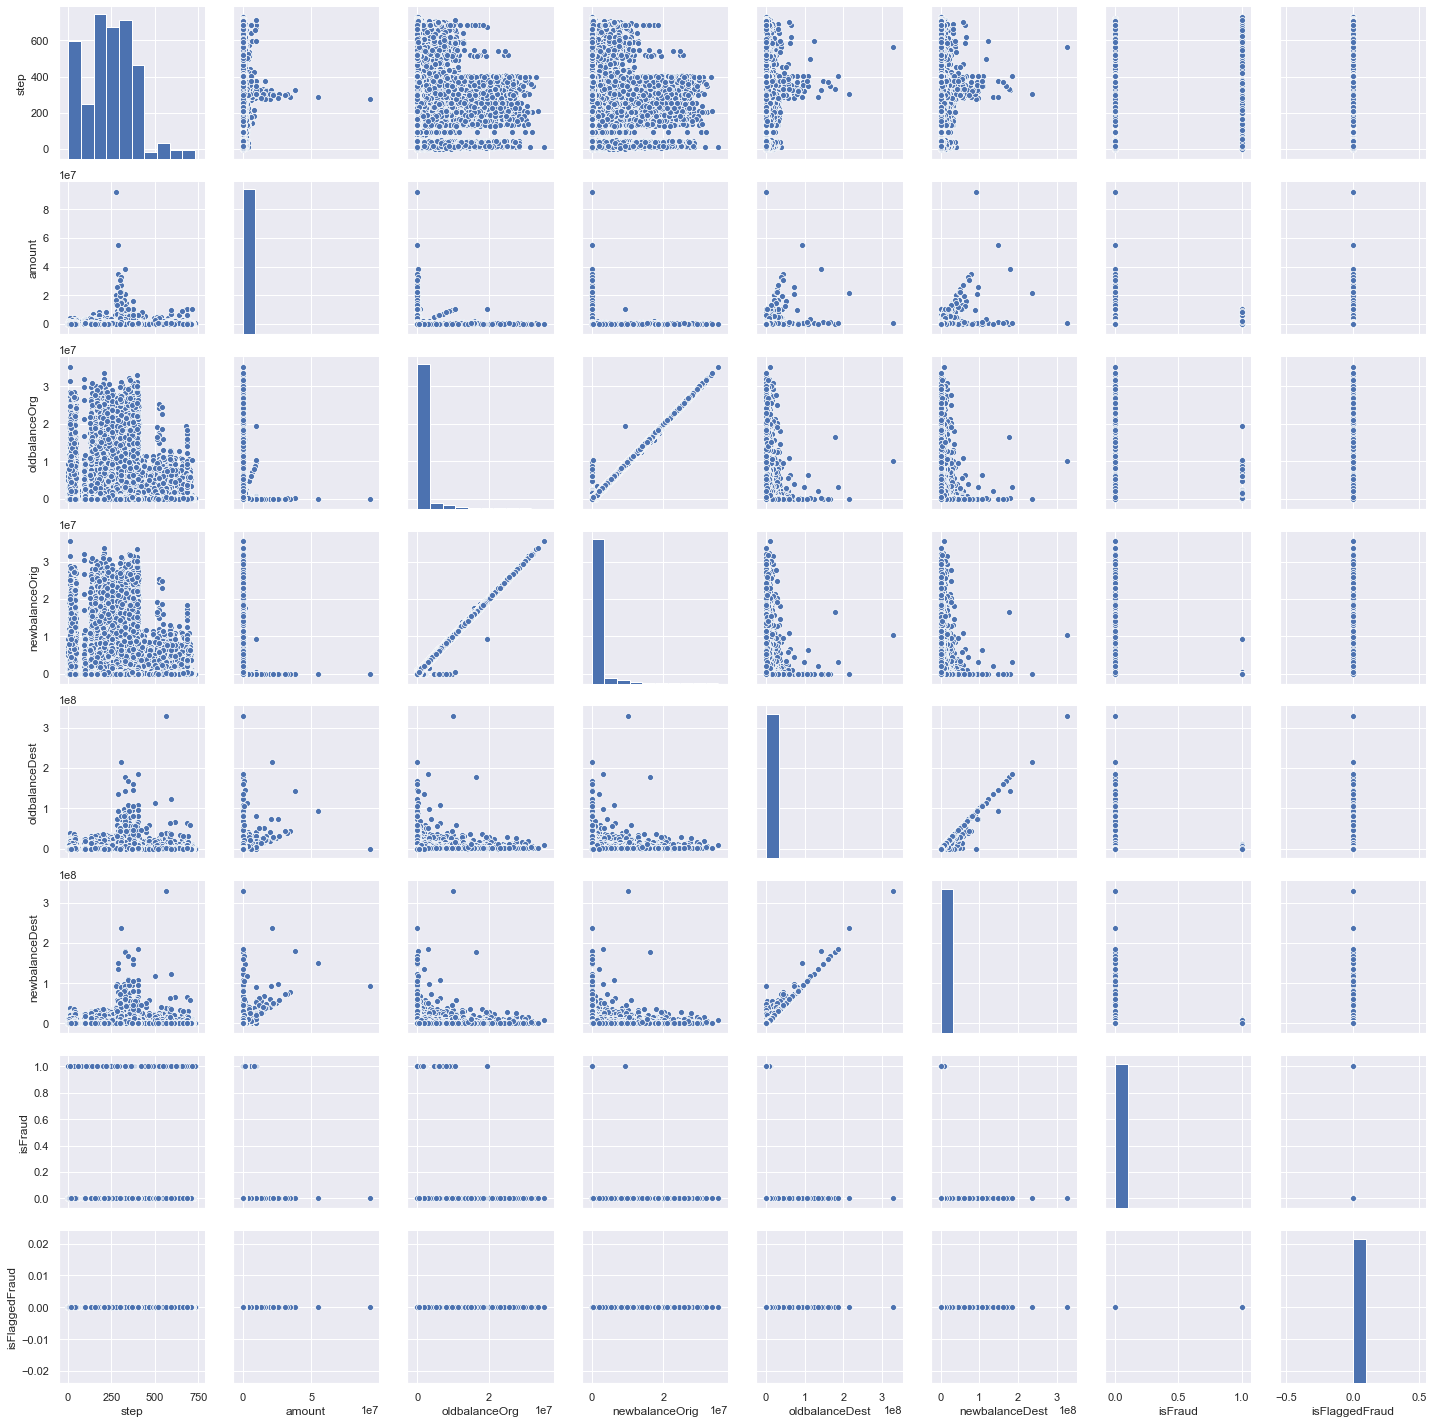

In [39]:
sns.pairplot(paysim_new)

### What is the distribution of the outcome? 

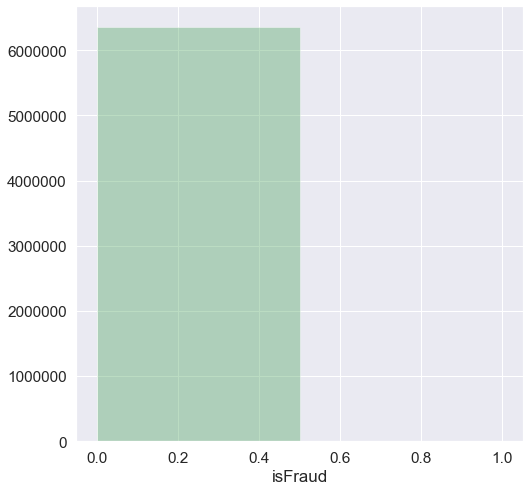

In [40]:
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.set_color_codes()
sns.set(font_scale=1.4)
sns.distplot(paysim["isFraud"],bins=2,kde=False, color = "g")

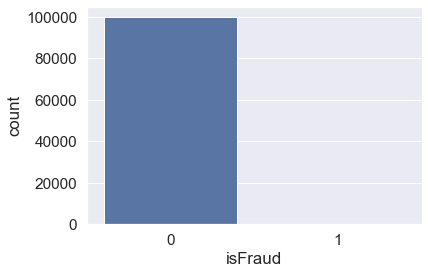

In [41]:
# Your response here
sns.set_style('whitegrid')
sns.set(font_scale=1.4)
sns.countplot(paysim_new["isFraud"])

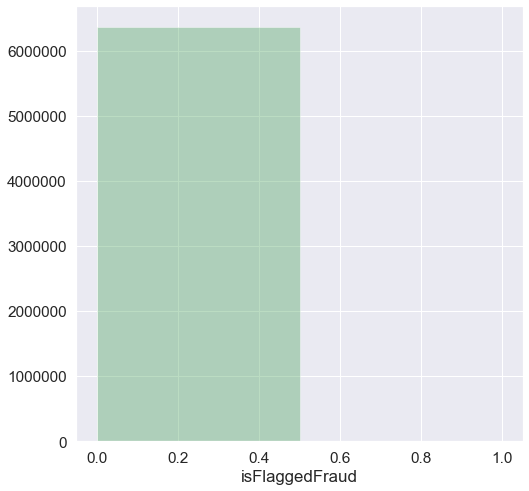

In [42]:
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.set_color_codes()
sns.set(font_scale=1.4)
sns.distplot(paysim["isFlaggedFraud"],bins=2,kde=False, color = "g")

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [43]:
# Your code here
paysim_new.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [44]:
paysim_new.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [45]:
# Dropping columns step and type, because not useful
paysim_new.drop(['step', 'type', 'nameOrig','nameDest'],axis=1,inplace=True)

### Run a logisitc regression classifier and evaluate its accuracy.

In [46]:
# Your code here
from sklearn.model_selection import train_test_split

y = paysim_new['isFraud']
X = paysim_new.drop(['isFraud'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 29, shuffle= True)

In [48]:
model = LogisticRegression()
model = model.fit(X_train,y_train)
acc_score = model.score(X_test, y_test)
print(acc_score)

/Users/juliette/opt/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.99795


/Users/juliette/opt/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Now pick a model of your choice and evaluate its accuracy.

In [50]:
# Doing the decision tree:

from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

regr = DecisionTreeRegressor(random_state = 31)
model = regr.fit(X_train, y_train)
model.score(X_test, y_test)

0.33253237217994935

### Which model worked better and how do you know?

In [2]:
# Your response here

"""
The Decision Tree model is showing a very bad accuracy, whereas the linear regression is showing a 
accuracy that is too high.
Therefore both models do not seem to work well.
"""